In [24]:
# find out what values I get as my control, check errors against them. 
# do first
# Nodes: 
# We grab phase A B C data for voltage and angle
# (in order)
# M650
# RG60 (regulator between m650 and m632)
# M632
# M633
# XFXFM1 (transformer between 633 and 634)
# M634
# M645
# M646
# M671
# M680
# M684
# M611
# M652
# M692
# M675
# made the dictionary
mname_lst = ['m650',
    'm632',
    'm633',
    'm645',
    'm671',
    'm634',
    'm646',
    'm680',
    'm684',
    'm692',
    'm611',
    'm652',
    'm675']
def get_IEEE():
    nom_voltage = 2401.7771
    transform_r = 480/4160 
    m_lst = ['m650', 'm632', 'm633', 'm634', 'm645', 'm646', 'm671', 'm680', 'm684', 'm611', 'm652', 'm692', 'm675']
    m_mags_pu_A_str = ['1.000', '1.021', '1.018', '.994', '0.0', '0.0', '.990', '.990', '.988', '0.0', '.983', '.983', '.983']
    m_ang_deg_A_str = ['.00', '-2.49', '-2.56', '-3.23', '0.0', '0.0', '-5.30', '-5.30', '-5.32', '0.0', '-5.25', '-5.31', '-5.56']
    m_mags_pu_B_str = ['1.000', '1.042', '1.040', '1.022', '1.033', '1.031', '1.053', '1.053', '0.0', '0.0', '0.0', '1.053', '1.055']
    m_ang_deg_B_str = ['-120.00', '-121.72', '-121.77', '-122.22', '-121.90', '-121.98', '-121.34', '-122.34', '0.0', '0.0', '0.0', '-122.34', '-122.52']
    m_mags_pu_C_str = ['1.000', '1.017', '1.015', '0.996', '1.015', '1.013', '0.978', '0.978', '0.976', '0.974', '0.0', '0.978', '0.976']
    m_ang_deg_C_str = ['120.00', '117.83', '117.82', '117.34', '117.86', '117.90', '116.02', '116.02', '115.92', '115.78', '0.0', '116.02', '116.03']
    m_mags_pu_A = [float(a) for a in m_mags_pu_A_str]
    m_ang_deg_A = [float(a) for a in m_ang_deg_A_str]
    m_mags_pu_B = [float(a) for a in m_mags_pu_B_str]
    m_ang_deg_B = [float(a) for a in m_ang_deg_B_str]
    m_mags_pu_C = [float(a) for a in m_mags_pu_C_str]
    m_ang_deg_C = [float(a) for a in m_ang_deg_C_str]
    m_mags_pu_A_dict = {key:value for key, value in zip(m_lst,m_mags_pu_A )}
    m_ang_deg_A_dict = {key:value for key, value in zip(m_lst,m_ang_deg_A )}
    m_mags_pu_B_dict = {key:value for key, value in zip(m_lst,m_mags_pu_B )}
    m_ang_deg_B_dict = {key:value for key, value in zip(m_lst,m_ang_deg_B )}
    m_mags_pu_C_dict = {key:value for key, value in zip(m_lst,m_mags_pu_C )}
    m_ang_deg_C_dict = {key:value for key, value in zip(m_lst,m_ang_deg_C )}
    m_range = [i for i in range(0,len(m_mags_pu_A))]
    m_mags_val_A_dict = {key:(value * nom_voltage) for key, value, m in zip(m_lst, m_mags_pu_A, m_range)}
    m_mags_val_B_dict = {key:(value * nom_voltage) for key, value, m in zip(m_lst, m_mags_pu_B, m_range)}
    m_mags_val_C_dict = {key:(value * nom_voltage) for key, value, m in zip(m_lst, m_mags_pu_C, m_range)}
    m_mags_val_A_dict['m634'] = m_mags_val_A_dict['m634'] * transform_r
    m_mags_val_B_dict['m634'] = m_mags_val_B_dict['m634'] * transform_r
    m_mags_val_C_dict['m634'] = m_mags_val_C_dict['m634'] * transform_r
    IEEE_mags_phase = {}
    IEEE_mags_phase['A'] = m_mags_val_A_dict
    IEEE_mags_phase['B'] = m_mags_val_B_dict
    IEEE_mags_phase['C'] = m_mags_val_C_dict
    IEEE_ang_phase = {}
    IEEE_ang_phase['A'] = m_ang_deg_A_dict
    IEEE_ang_phase['B'] = m_ang_deg_B_dict
    IEEE_ang_phase['C'] = m_ang_deg_C_dict
    return IEEE_mags_phase, IEEE_ang_phase



# key:(value * nom_v_2) if (m == 3) else 
# key:(value * nom_v_2) if (m == 3) else 
# key:(value * nom_v_2) if (m == 3) else 




In [25]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# gives start and stop index of first float in a string
def extract_numbers(mstr):
    a = None
    b = None
    strlst = list(mstr)
    for i in range(0,len(strlst)):
        letter = strlst[i]
        if letter.isdigit and a == None:
            a = i
        elif (letter.isdigit() == False and letter != '.' and a != None):
            b = i
            break
    if a == None or b == None:
        print("no numbers")
    return a,b

# gives you list of first digits in a string and remaining list of what's behind
def give_float_lst(mlst):
    float_lst = []
    leftovers = []
    i = 0
    for x in mlst:
        a,b = extract_numbers(x)
        float_lst.append(float(x[a:b]))
        leftovers.append(x[b:])
    return float_lst, leftovers

def get_meter_voltages(my_xml):
    tree = ET.parse(my_xml)
    root = tree.getroot()
    print(root.tag)
    powerflow = None
    meter_lst = None
    mv_dict_A = {}
    mv_dict_B = {}
    mv_dict_C = {}
    for r in root:
    #     print(r.tag)
        if r.tag == "powerflow":
            powerflow = r
    for p in powerflow:
    #     print(p.tag)
        if p.tag == "meter_list":
            meter_lst = p
    for m in meter_lst:
        if m.tag == "inherits_from":
            continue
        mname = m.find('name').text
        mv_dict_A[mname] = m.find('measured_voltage_A').text
        mv_dict_B[mname] = m.find('measured_voltage_B').text
        mv_dict_C[mname] = m.find('measured_voltage_C').text
    return mv_dict_A, mv_dict_B, mv_dict_C
def remove_zeros_from_dict(my_dict):
    cp_dict = my_dict.copy()
    my_keys = my_dict.keys()
    for k in my_keys:
        if cp_dict[k] == 0.0:
            del cp_dict[k]
    return cp_dict
    
# what if we just have a function that takes in two dictionaries, and then we print the errors. 
def two_dict_plt(a_dict, b_dict, phase='A', y_label='Voltage (V)', mname_lst=None, toggle_error=True):
#     a_clean_dict = remove_zeros_from_dict(a_dict)
    if (mname_lst == None):
        mname_lst = list(a_dict.keys())
    a_lst = [a_dict[i] for i in mname_lst]
    b_lst = [b_dict[i] for i in mname_lst]
    err_lst = [ abs(b-a)/ a * 100 if (a != 0) else 0.0 for a,b in zip(a_lst, b_lst)]
    x = range(1,len(a_lst) + 1)
    plt.figure(1)
    plt.figure(figsize=(10,10))
    plt.xticks(x, mname_lst)
    plt.xlabel('Meters, closest to farthest from {0}'.format(mname_lst[0]))
    plt.ylabel(y_label)
    plt.title('Phase {1} {0} of Meters in IEEE 13 node feeder'.format(y_label, phase))
    plt.plot(x, a_lst, 'r')
    plt.plot(x, b_lst, 'b')
    plt.show()
    if (toggle_error):
        plt.figure(2)
        plt.figure(figsize=(10,10))
        plt.xticks(x, mname_lst)
        plt.xlabel('Meters, closest to farthest from m650')
        plt.ylabel('error (%)')
        plt.title('Phase {1} {0} of Meters in IEEE 13 node feeder'.format(y_label, phase))
        plt.plot(x, err_lst)
        plt.show()
    return mname_lst, a_lst, b_lst, err_lst
def exp_volt_dict(my_dict):
    mname_lst = my_dict.keys()
    val_lst = list(my_dict.values())
    mag_lst, leftovers = give_float_lst(val_lst)
    angle_lst, aleftovers = give_float_lst(leftovers)
    mag_dict = {key: val for key,val in zip(mname_lst,mag_lst)}
    angle_dict = {key: val for key,val in zip(mname_lst,angle_lst)}
    return mag_dict, angle_dict
def volt_plt(my_dict, phase="A", mname_lst=None, toggle_error=True):
    mag_dict, ang_dict = exp_volt_dict(my_dict)
    IEEE_mags_phase, IEEE_ang_phase  = get_IEEE()
    IEEE_mags = IEEE_mags_phase[phase]
    IEEE_ang = IEEE_ang_phase[phase]
    mname_lst, _, _, err_mag = two_dict_plt(IEEE_mags, mag_dict, phase, 'Voltage (V)', mname_lst,toggle_error)
    mname_lst, _, _, err_ang = two_dict_plt(IEEE_ang, ang_dict, phase, 'degrees', mname_lst,toggle_error)
    err_mag_dict = {key:val for key,val in zip(mname_lst, err_mag)}
    err_ang_dict = {key:val for key,val in zip(mname_lst, err_ang)}

    return mag_dict, err_mag_dict, ang_dict, err_ang_dict



In [123]:
# how do we deal with the transformer without taking it out of relevance? Ask this later to the professor. 
def add_axes_data(ax, y_lines_lst, y_lines_lbls, lbl_lst, y_label, phase):
    if (len(y_lines_lst) < 1 or len(y_lines_lst) != len(y_lines_lbls)):
        return
    a_lst = y_lines_lst[0]
    x = range(1,len(a_lst) + 1)
    ax.xaxis.set_ticks(x)
    ax.set_xticklabels(lbl_lst)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.set_xlabel('Meters, closest to farthest from {0}'.format(mname_lst[0]))
    ax.set_ylabel(y_label)
    ax.set_title('Phase {1} {0} of Meters in IEEE 13 node feeder'.format(y_label, phase))
    for y,y_lbl in zip( y_lines_lst, y_lines_lbls):
        y_line, = ax.plot(x, y, label=y_lbl)
    ax.legend()

    gridlines = []
    ticklines = []
    ax.grid(True)
    gridlines += ax.get_xgridlines() + ax.get_ygridlines()
    ticklines += ax.get_xticklines() + ax.get_yticklines()
    for line, l2 in zip(gridlines,ticklines):
        line.set_linestyle('-.')
        l2.set_linewidth(3)
        
def give_lsts_and_lbls(dict1, dict2, name_lst, unit_val, min_val=0.5):
    f_lst_p = [(i , dict1[i] / unit_val) for i in name_lst if dict1[i] / unit_val > min_val]
    g_lst_p = [(i , dict2[i] / unit_val) for i in name_lst if dict2[i] / unit_val > min_val]
    lbl_lst = [f[0] for f in f_lst_p]
    f_lst = [f[1] for f in f_lst_p]
    g_lst = [g[1] for g in g_lst_p]
    return f_lst, g_lst, lbl_lst

# what if we just have a function that takes in two dictionaries, and then we print the errors. 
def six_dict_plt(a_dict_lst, b_dict_lst, c_dict_lst, d_dict_lst,
                 mname_lst=None, toggle_error=True, ylabel1='Voltage (V)',
                 ylabel2='Angle', filename='voltage',l1_name='base', l2_name='test'):
#     initialization
    m_fig, ax_lst = plt.subplots(3,3, figsize=(10,10))
    e_fig, e_lst = plt.subplots(2,3, figsize=(10,10))
    m_fig.set_size_inches(20,15)
    e_fig.set_size_inches(20,10)
    plt.figure(figsize=(12,12))

    for a_dict, b_dict, c_dict, d_dict, letter, i in zip(a_dict_lst,b_dict_lst,c_dict_lst, d_dict_lst,
                                                         ('A','B','C'), (int(0),int(1),int(2))):
        if (mname_lst == None):
            mname_lst = list(a_dict.keys())
        phase = letter
        y_label = ylabel1
        a_lst, b_lst, lbl_lst_1 = give_lsts_and_lbls(a_dict, b_dict, mname_lst, 1, 1000)
        err_lst = [ abs(b-a)/ a * 100 if (a != 0) else 0.0 for a,b in zip(a_lst, b_lst)]
        add_axes_data(ax_lst[0][i], [a_lst, b_lst],[l1_name, l2_name], lbl_lst_1, y_label, phase)
        if (toggle_error):
            add_axes_data(e_lst[0][i], [err_lst],['error'], mname_lst, 'error %', phase) 
        y_label = ylabel2
        c_lst, d_lst, lbl_lst_2 = give_lsts_and_lbls(c_dict, d_dict, lbl_lst_1, 1,-369)
        err_lst = [ abs(b-a)/ a * 100 if (a != 0) else 0.0 for a,b in zip(c_lst, d_lst)]
        add_axes_data(ax_lst[1][i], [c_lst, d_lst],[l1_name, l2_name], lbl_lst_2, y_label, phase)
        if (toggle_error):
            add_axes_data(e_lst[1][i], [err_lst],['error'], mname_lst, 'error %', phase) 
        
            
# now make set of graphs for p.u. 
    pu_volt = 2401.7771
    for a_dict, b_dict, letter, i in zip(a_dict_lst,b_dict_lst, ('A','B','C'), (int(0),int(1),int(2))):
        if (mname_lst == None):
            mname_lst = list(a_dict.keys())
        phase = letter
        y_label = 'Voltage (p.u.)'
        f_lst, g_lst, lbl_lst_3 = give_lsts_and_lbls(a_dict, b_dict, mname_lst, pu_volt)
        add_axes_data(ax_lst[2][i], [f_lst, g_lst],[l1_name, l2_name], lbl_lst_3, y_label, phase)      
            
    m_fig.tight_layout()
    e_fig.tight_layout()   
    m_fig.savefig('cmpIEEE13plts/' + filename)
    e_fig.savefig('cmpIEEE13plts/' + filename + '_error')
    plt.show()
    return None



In [122]:


def compare_gridlab_IEEE(xml_name, ylabel1='Voltage (V)', ylabel2='Angle', filename='Voltage'):
    IEEE_mags_phase, IEEE_ang_phase = get_IEEE()
    mv_dict_A, mv_dict_B, mv_dict_C = get_meter_voltages(xml_name)
    a_dict_lst = [IEEE_mags_phase[phase] for phase in ('A', 'B', 'C')]
    b_dict_lst = [exp_volt_dict(my_dict)[0] for my_dict in (mv_dict_A, mv_dict_B, mv_dict_C)]
    c_dict_lst = [IEEE_ang_phase[phase] for phase in ('A', 'B', 'C')]
    d_dict_lst = [exp_volt_dict(my_dict)[1] for my_dict in (mv_dict_A, mv_dict_B, mv_dict_C)]
    six_dict_plt(a_dict_lst, b_dict_lst, c_dict_lst, d_dict_lst, mname_lst,ylabel1=ylabel1, ylabel2=ylabel2,filename=filename)

def compare_gridlab_xmls(xml_name1, xml_name2, ylabel1='Voltage (V)', ylabel2='Angle', filename='Voltage'):
    mname_lst = ['m650',
    'm632',
    'm633',
    'm645',
    'm671',
    'm634',
    'm646',
    'm680',
    'm684',
    'm692',
    'm611',
    'm652',
    'm675']
    mv_dict_A_1, mv_dict_B_1, mv_dict_C_1 = get_meter_voltages(xml_name1)
    mv_dict_A_2, mv_dict_B_2, mv_dict_C_2 = get_meter_voltages(xml_name2)
    a_dict_lst = [exp_volt_dict(my_dict)[1] for my_dict in (mv_dict_A_1, mv_dict_B_1, mv_dict_C_1)]
    b_dict_lst = [exp_volt_dict(my_dict)[0] for my_dict in (mv_dict_A_2, mv_dict_B_2, mv_dict_C_2)]
    c_dict_lst = [exp_volt_dict(my_dict)[1] for my_dict in (mv_dict_A_1, mv_dict_B_1, mv_dict_C_1)]
    d_dict_lst = [exp_volt_dict(my_dict)[1] for my_dict in (mv_dict_A_2, mv_dict_B_2, mv_dict_C_2)]
    six_dict_plt(a_dict_lst, b_dict_lst, c_dict_lst, d_dict_lst, mname_lst,ylabel1, ylabel2,filename)
    


gridlabd


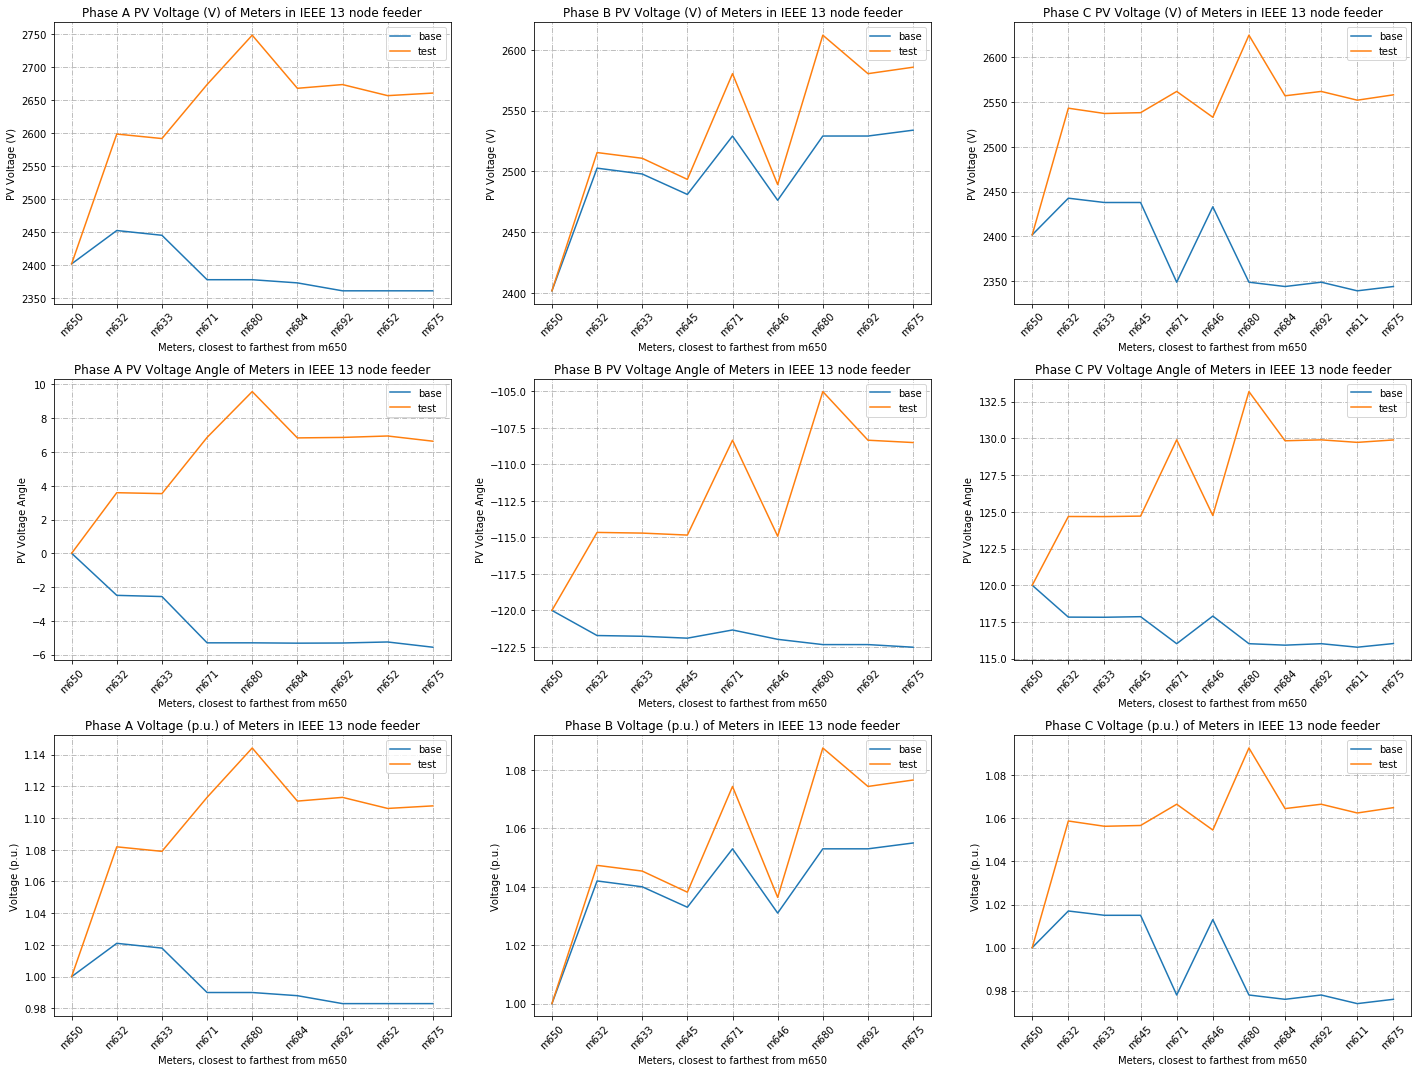

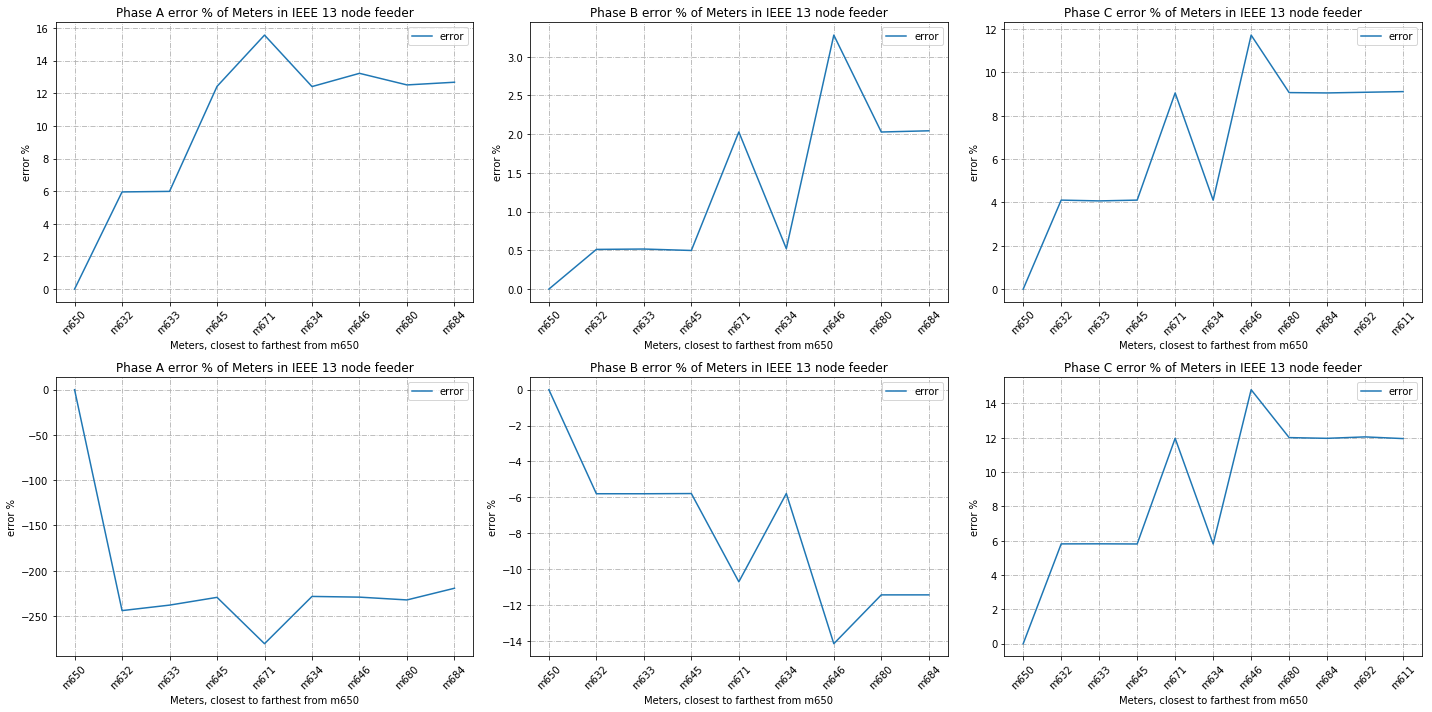

In [126]:
compare_gridlab_IEEE('IEEE13_pv1.xml', ylabel1='PV Voltage (V)', ylabel2='PV Voltage Angle', filename='VoltagePV')

gridlabd


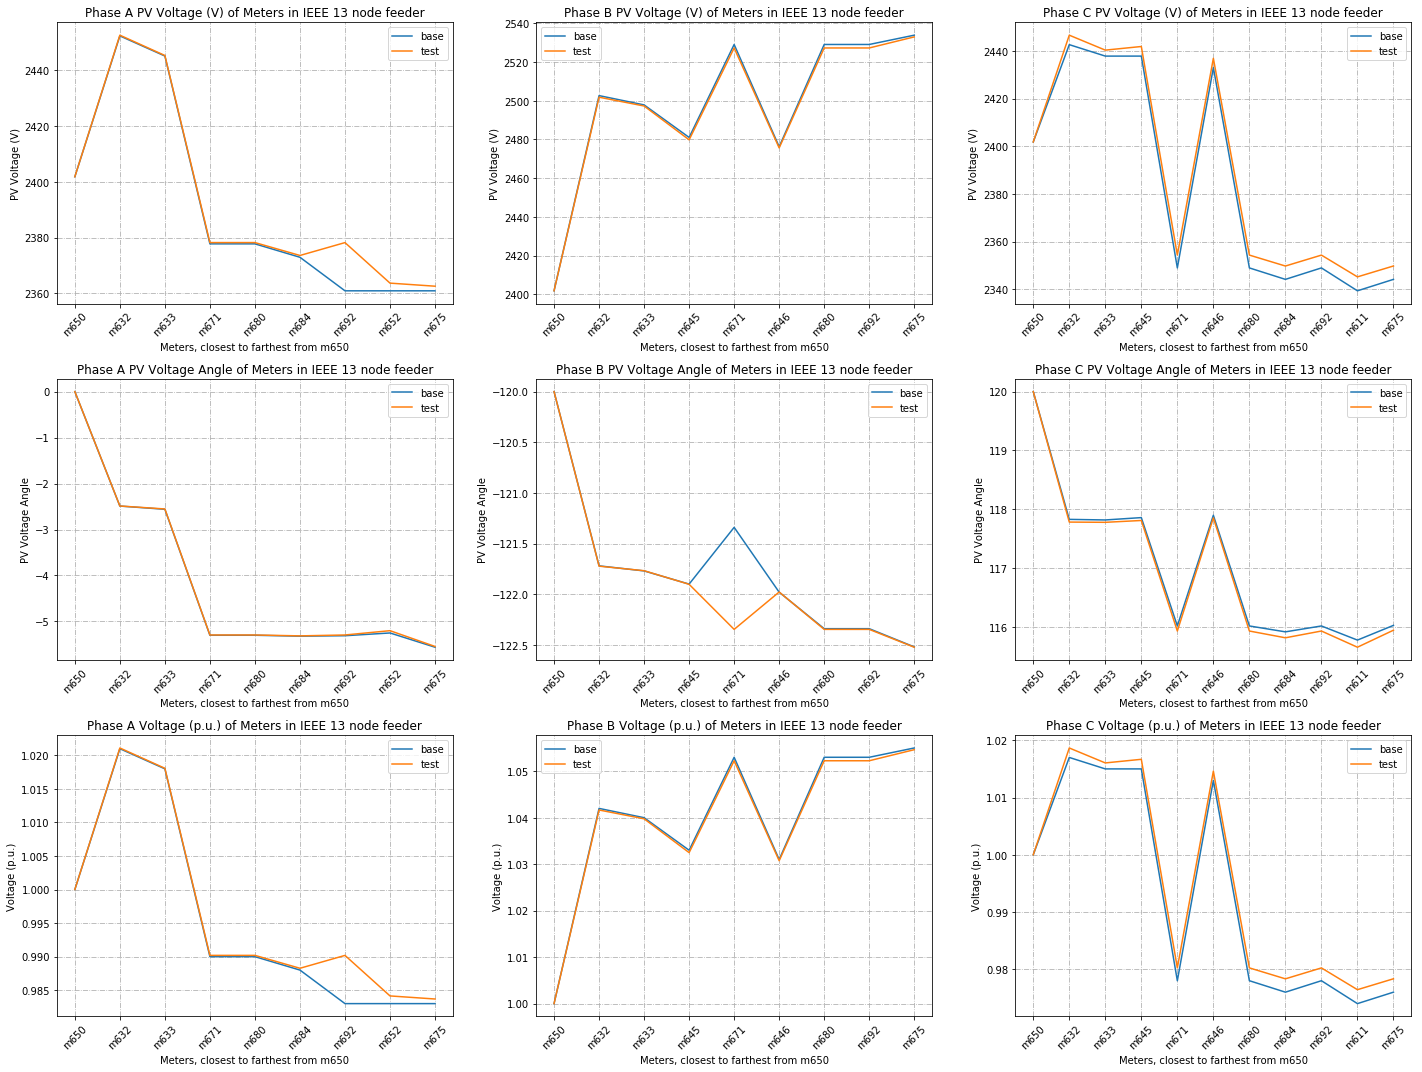

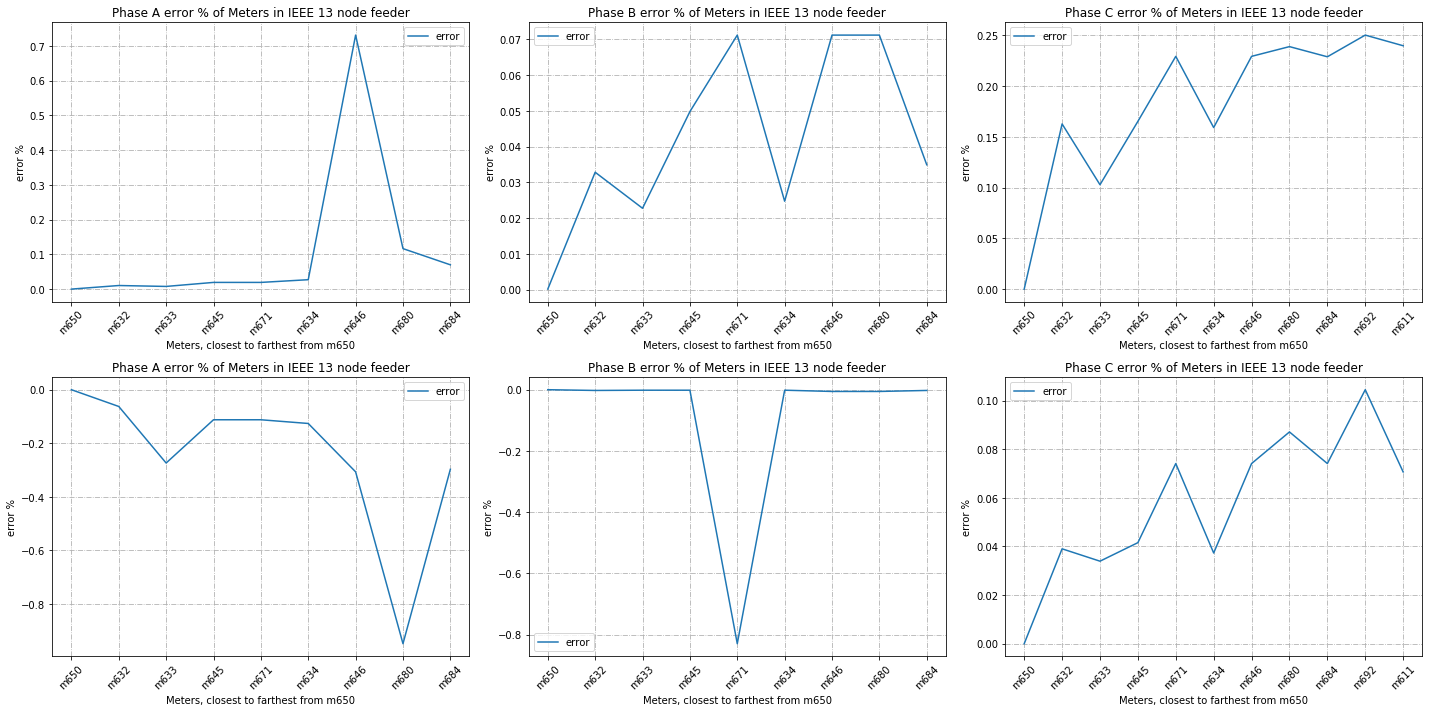

In [127]:
compare_gridlab_IEEE('IEEE13_eric.xml', ylabel1='PV Voltage (V)', ylabel2='PV Voltage Angle')

gridlabd
gridlabd


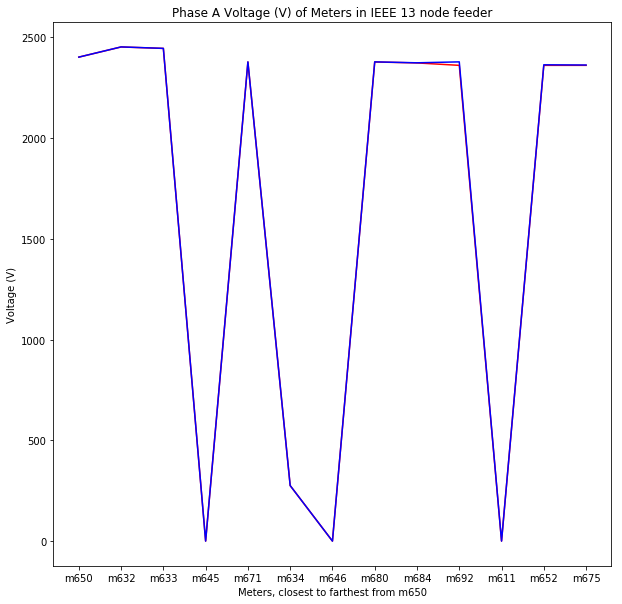

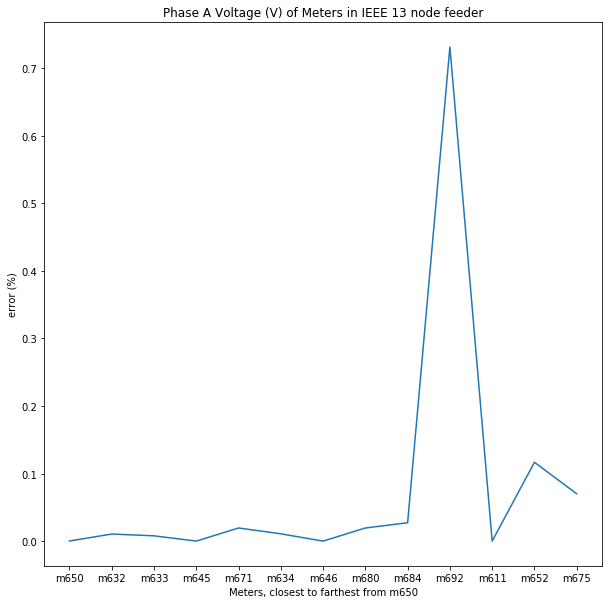

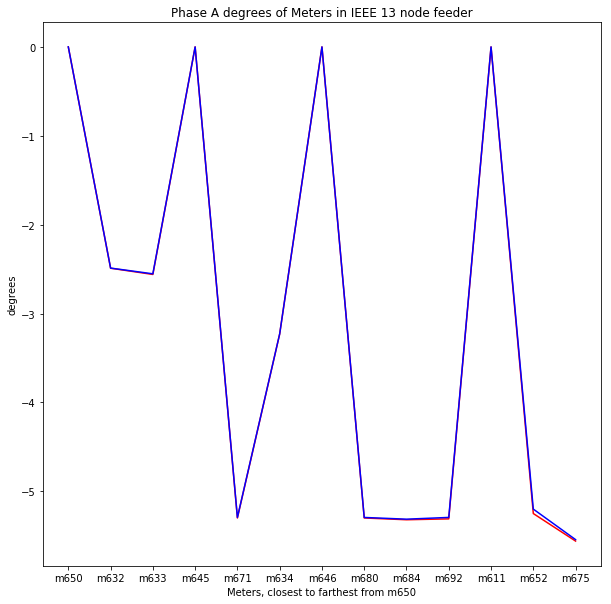

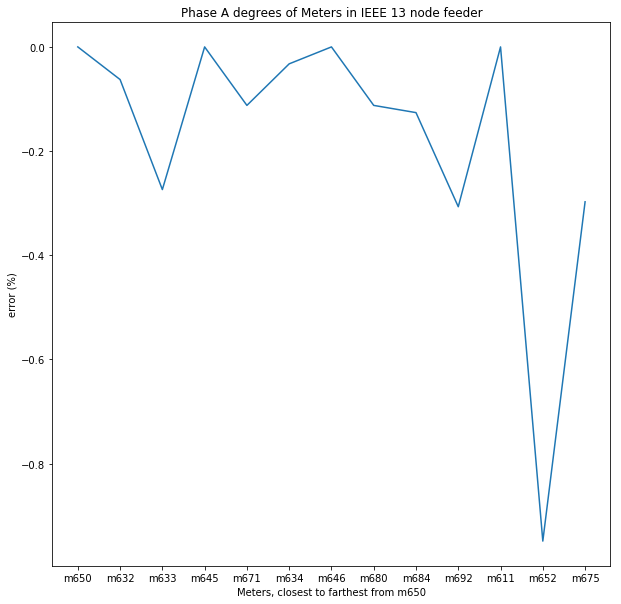

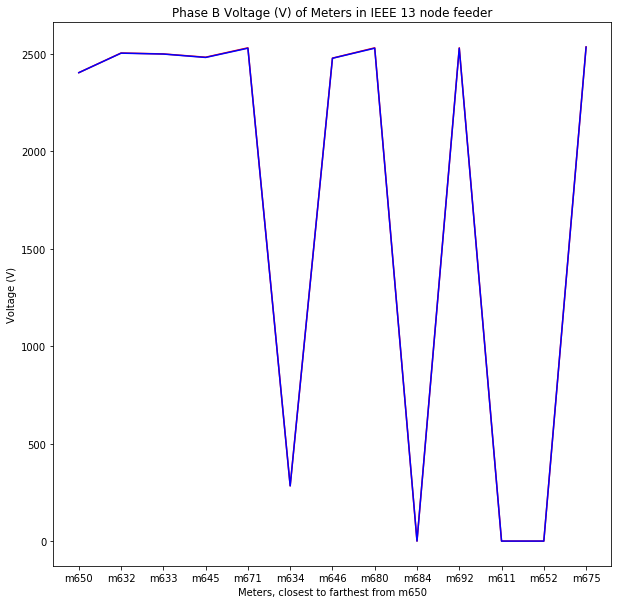

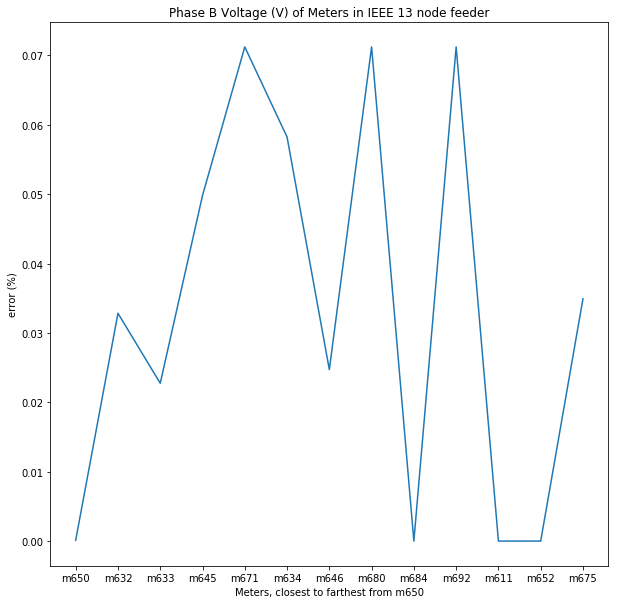

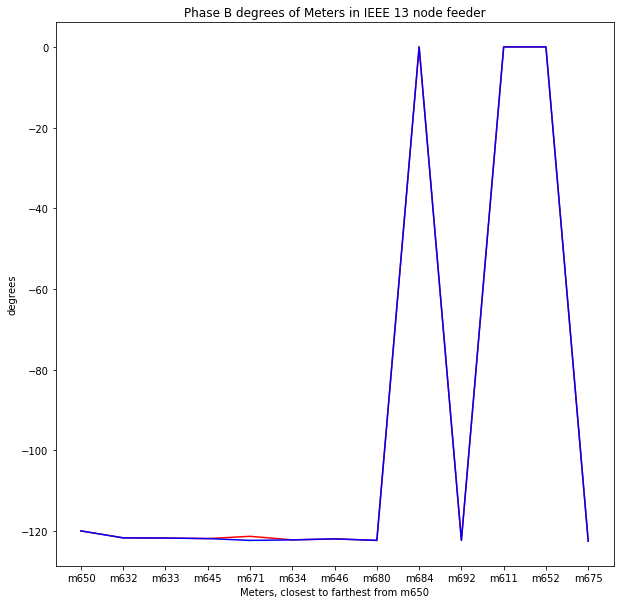

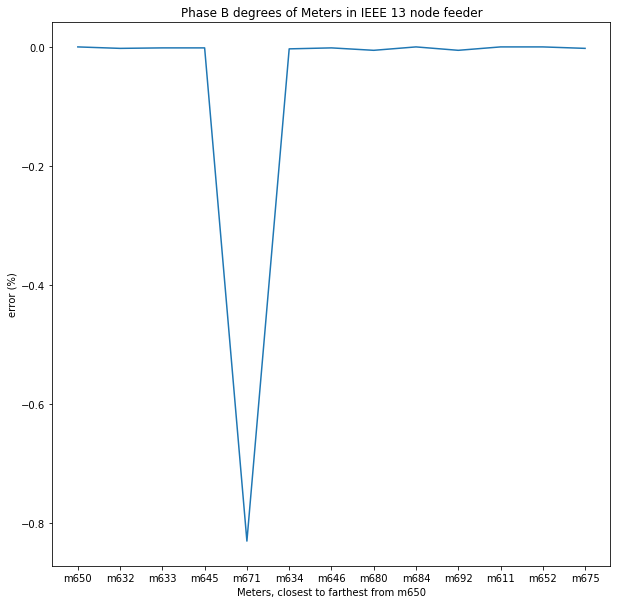

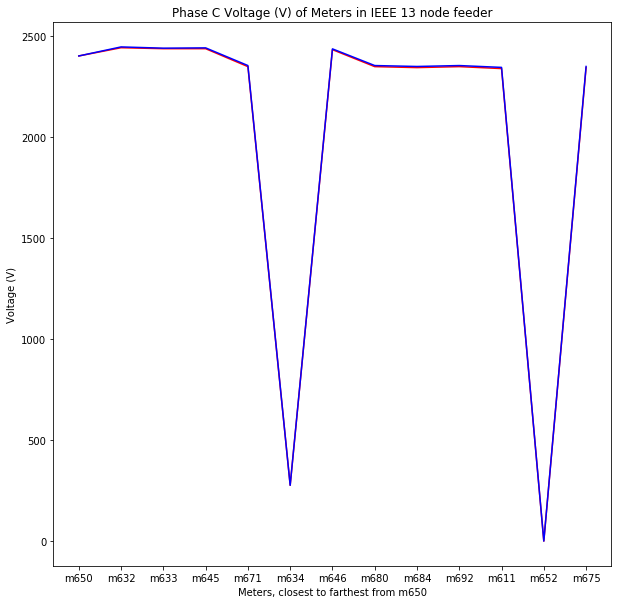

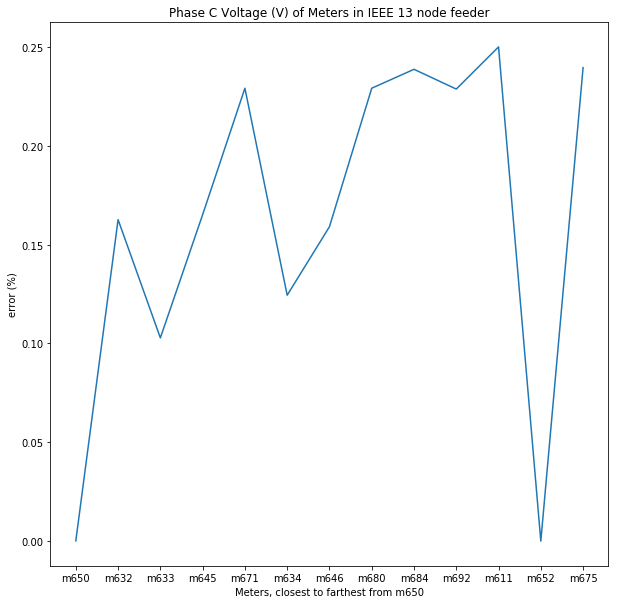

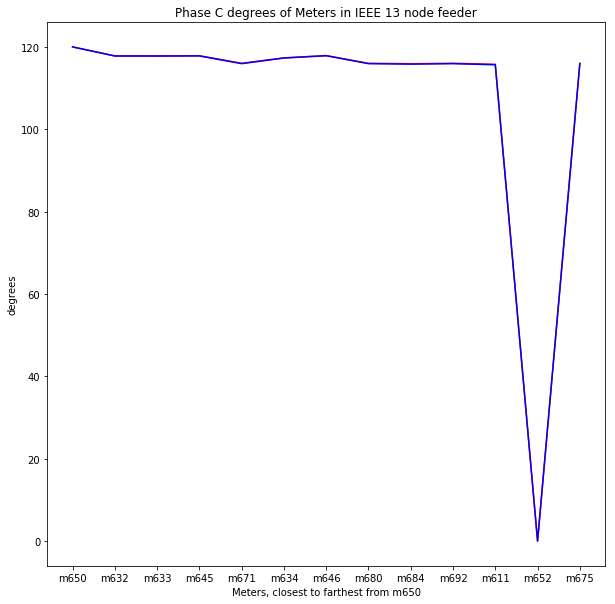

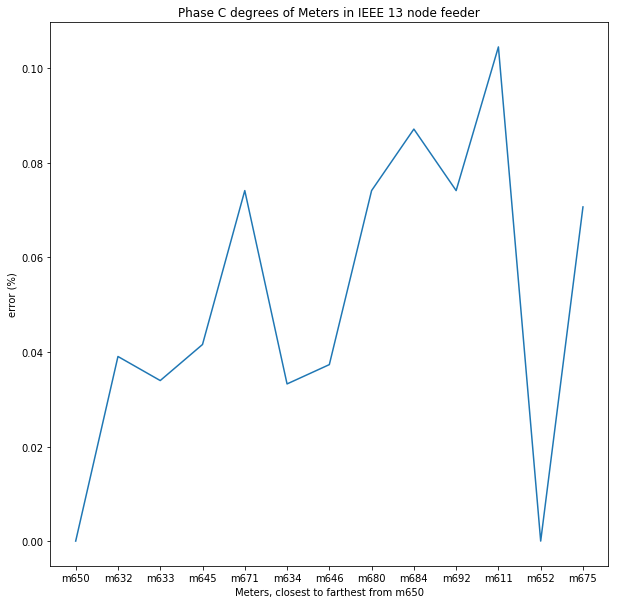

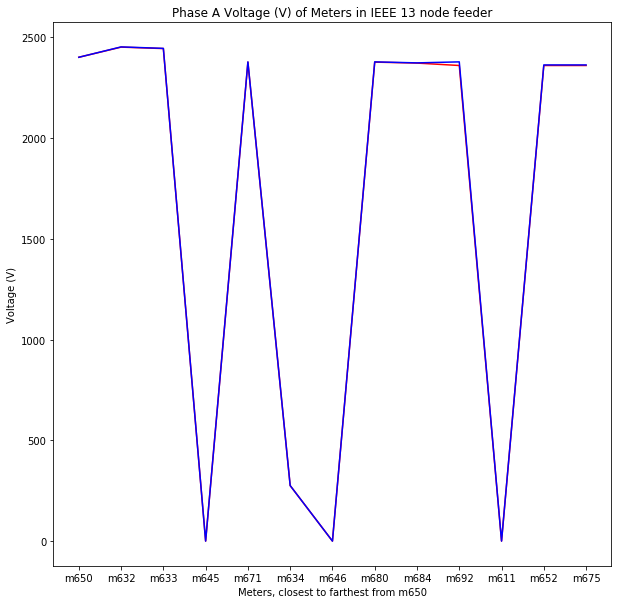

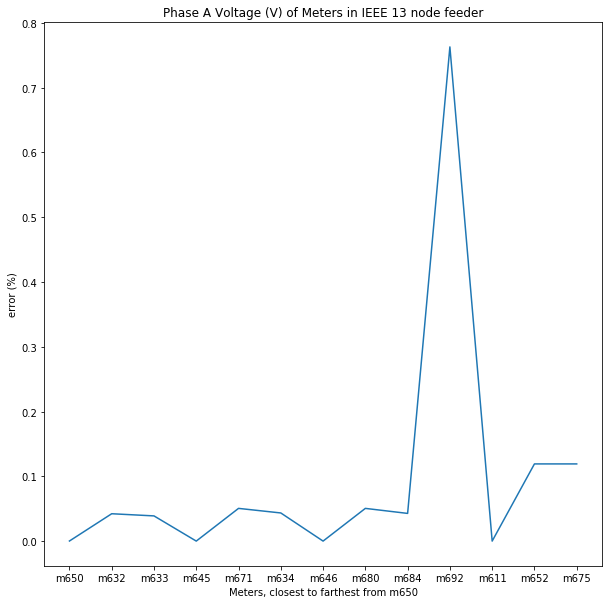

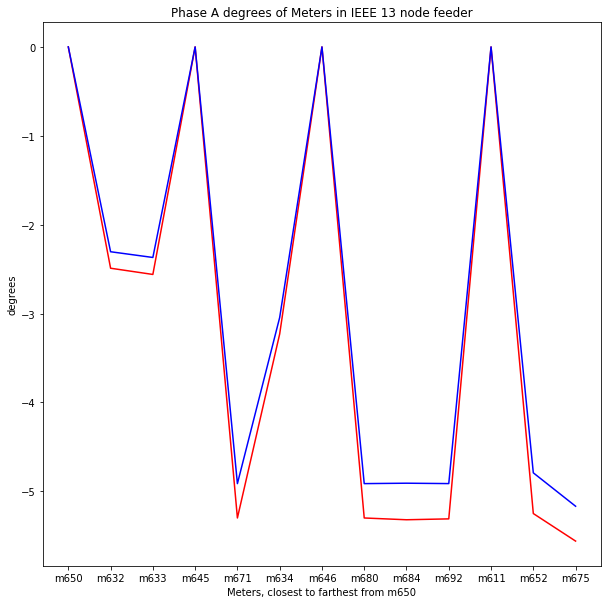

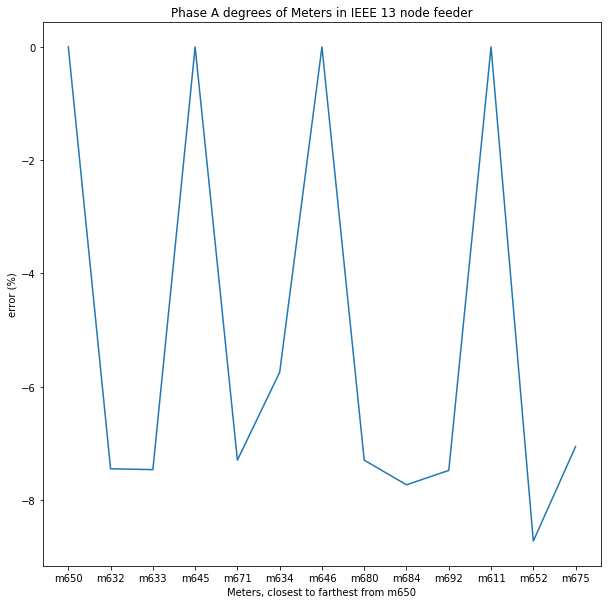

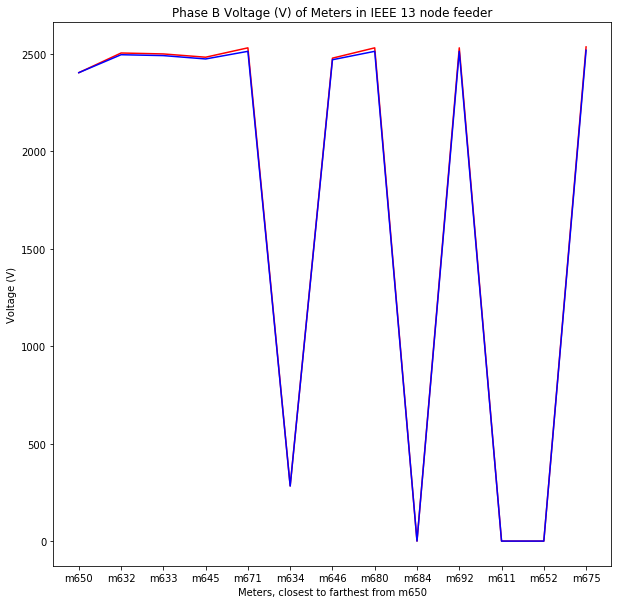

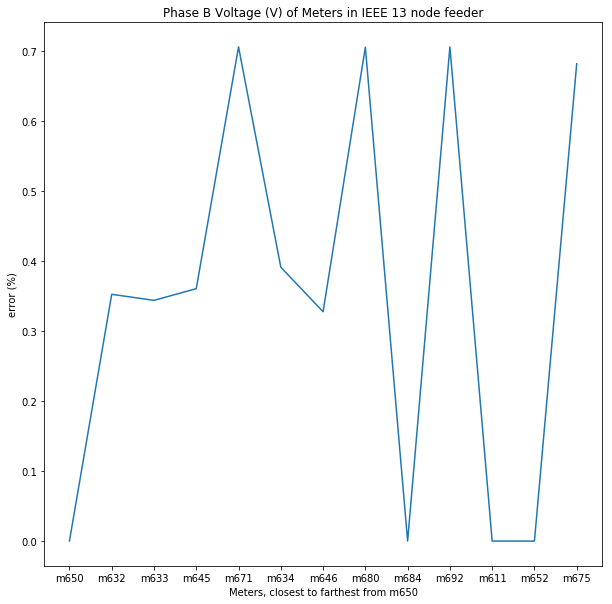

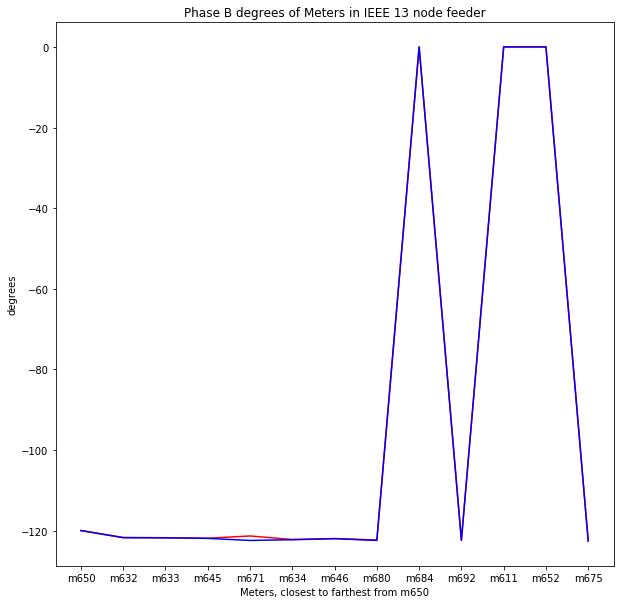

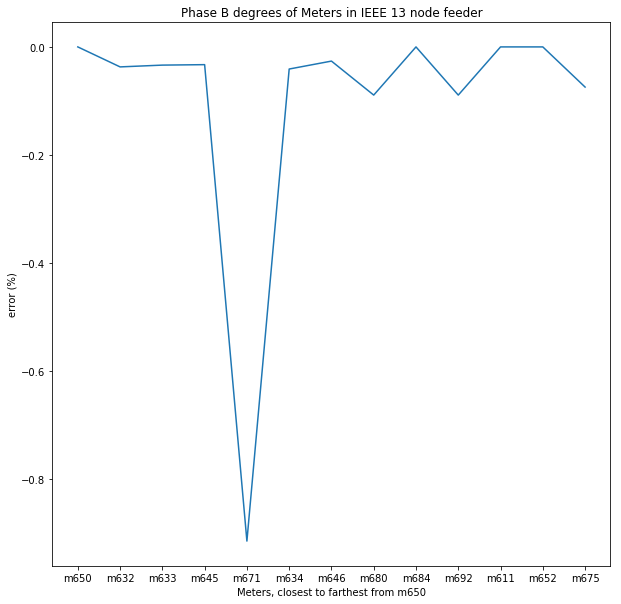

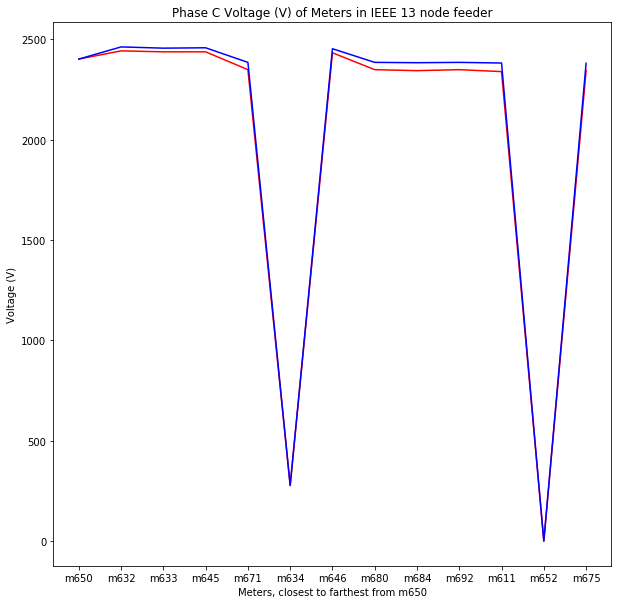

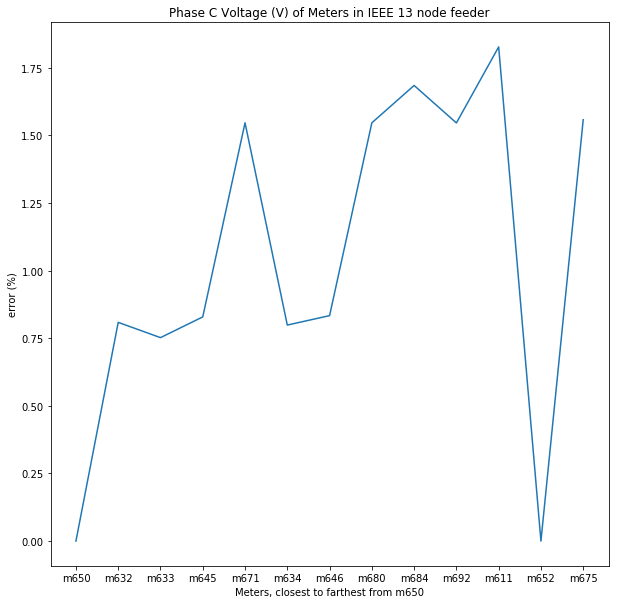

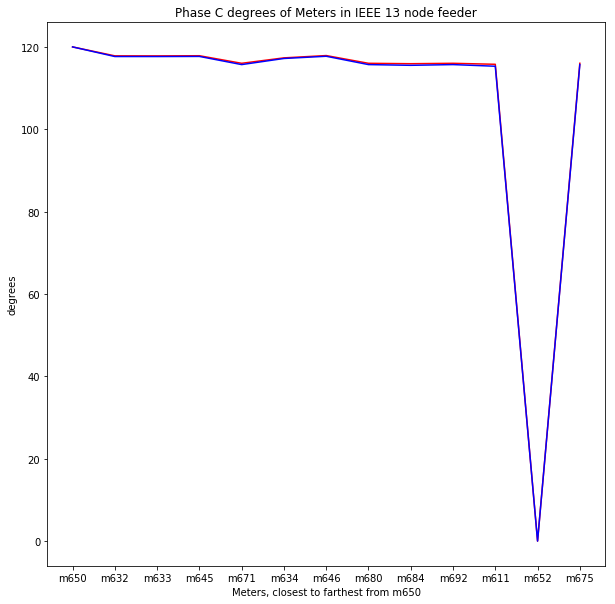

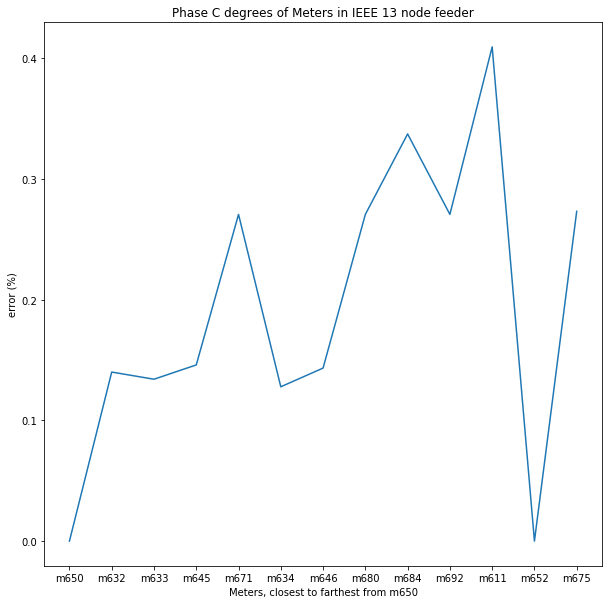

In [21]:
# this is results if we did the all-power IEEE xml file
mv_dict_A, mv_dict_B, mv_dict_C = get_meter_voltages('IEEE13_eric.xml')
mv_dict_A_2, mv_dict_B_2, mv_dict_C_2 = get_meter_voltages('IEEE13_eric_3.xml')
mag_dict_A, err_mag_dict_A, ang_dict_A, err_ang_dict_A = volt_plt(mv_dict_A, "A", mname_lst)
mag_dict_B, err_mag_dict_B, ang_dict_B, err_ang_dict_B = volt_plt(mv_dict_B, "B", mname_lst)
mag_dict_C, err_mag_dict_C, ang_dict_C, err_ang_dict_C = volt_plt(mv_dict_C, "C",mname_lst)
mag_dict_A_2, err_mag_dict_A_2, ang_dict_A_2, err_ang_dict_A_2 = volt_plt(mv_dict_A_2, "A", mname_lst)
mag_dict_B_2, err_mag_dict_B_2, ang_dict_B_2, err_ang_dict_B_2 = volt_plt(mv_dict_B_2, "B", mname_lst)
mag_dict_C_2, err_mag_dict_C_2, ang_dict_C_2, err_ang_dict_C_2 = volt_plt(mv_dict_C_2, "C",mname_lst)






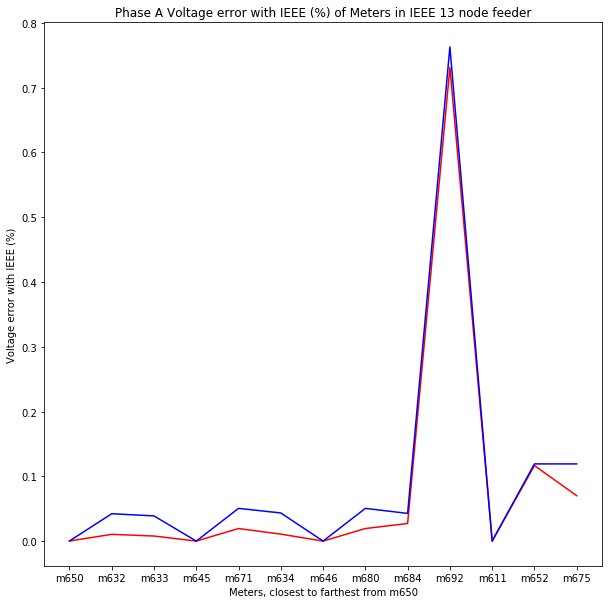

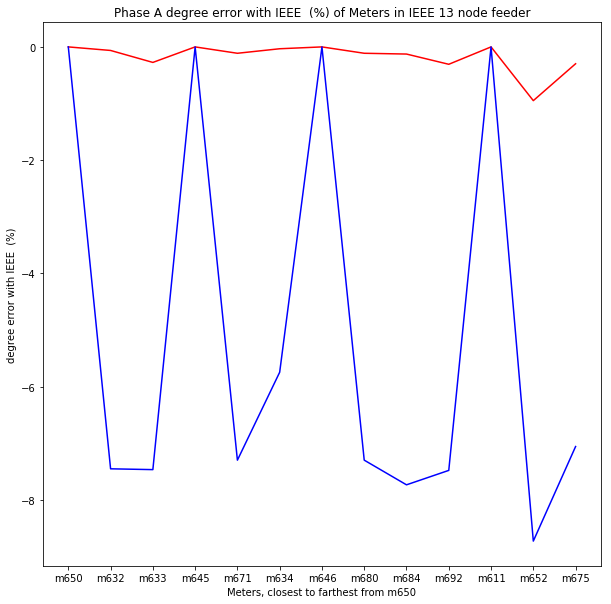

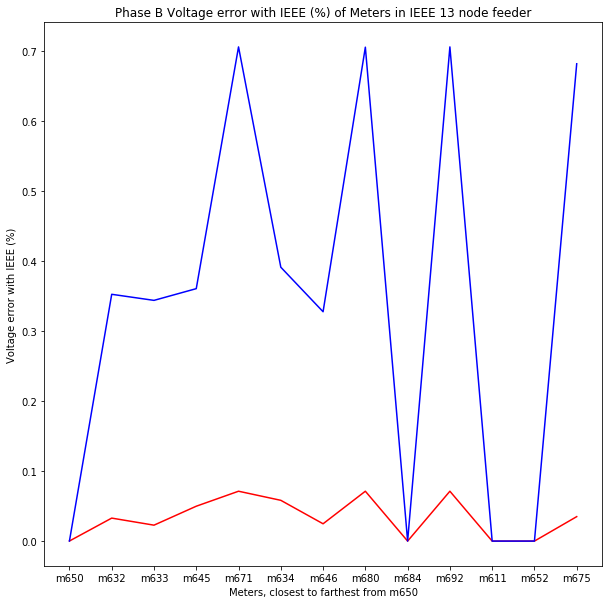

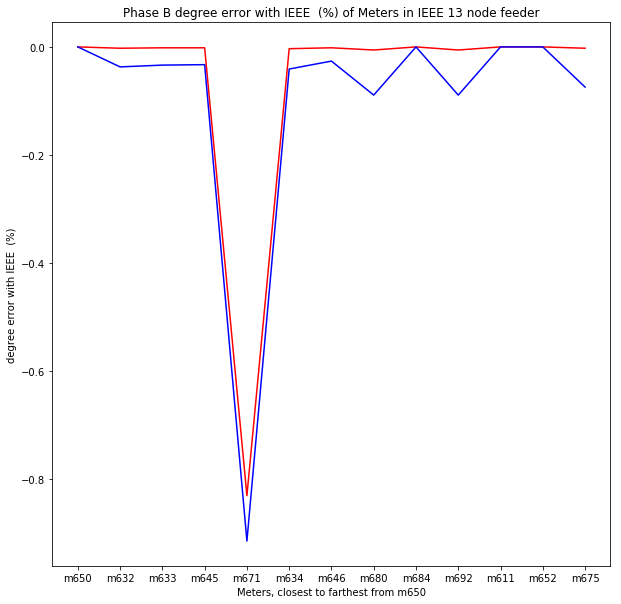

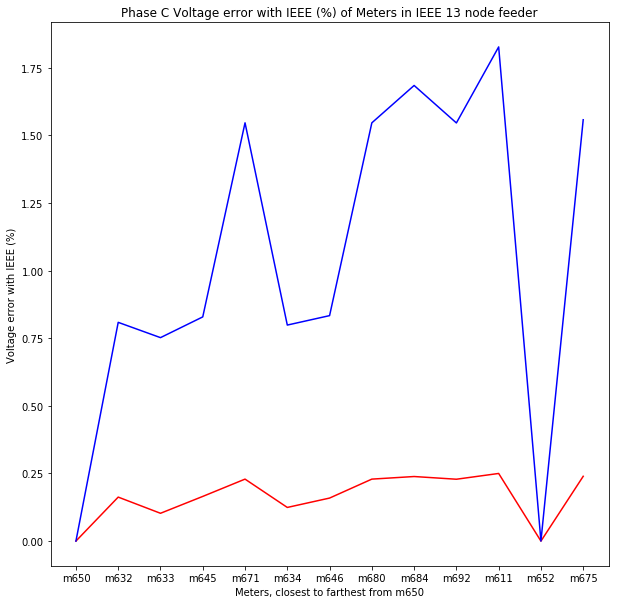

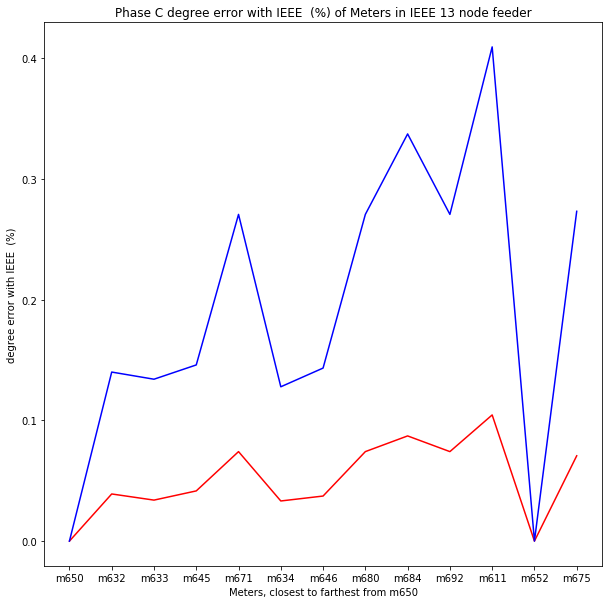

(['m650',
  'm632',
  'm633',
  'm645',
  'm671',
  'm634',
  'm646',
  'm680',
  'm684',
  'm692',
  'm611',
  'm652',
  'm675'],
 [0.0,
  0.039039293897982066,
  0.03395009336275,
  0.041574749703031044,
  0.07412515083606147,
  0.03323674791205171,
  0.03731976251061165,
  0.07412515083606147,
  0.08712905452035807,
  0.07412515083606147,
  0.10450855069959848,
  0.0,
  0.07067137809187955],
 [0.0,
  0.1400322498514742,
  0.13410286878287817,
  0.14593585610045567,
  0.27064299258747887,
  0.1278336458155835,
  0.14334181509754973,
  0.27064299258747887,
  0.33730158730159193,
  0.27064299258747887,
  0.4093971324926617,
  0.0,
  0.273205205550295],
 [0.0,
  258.69565217395603,
  295.00000000004616,
  251.02040816331385,
  265.11627906976554,
  284.61538461538464,
  284.0909090908372,
  265.11627906976554,
  287.12871287129593,
  265.11627906976554,
  291.7355371901015,
  0.0,
  286.58536585363044])

In [17]:
# now compare with the original:
two_dict_plt(err_mag_dict_A, err_mag_dict_A_2, 'A', 'Voltage error with IEEE (%)', mname_lst, False)
two_dict_plt(err_ang_dict_A, err_ang_dict_A_2, 'A', 'degree error with IEEE  (%)', mname_lst, False)
two_dict_plt(err_mag_dict_B, err_mag_dict_B_2, 'B', 'Voltage error with IEEE (%)', mname_lst, False)
two_dict_plt(err_ang_dict_B, err_ang_dict_B_2, 'B', 'degree error with IEEE  (%)', mname_lst, False)
two_dict_plt(err_mag_dict_C, err_mag_dict_C_2, 'C', 'Voltage error with IEEE (%)', mname_lst, False)
two_dict_plt(err_ang_dict_C, err_ang_dict_C_2, 'C', 'degree error with IEEE  (%)', mname_lst, False)
 


In [18]:
err_dict = {
    'err_mag_dict_A' : err_mag_dict_A,
    'err_ang_dict_A' : err_ang_dict_A,
    'err_mag_dict_B' : err_mag_dict_B,
    'err_ang_dict_B' : err_ang_dict_B,
    'err_mag_dict_C' : err_mag_dict_C,
    'err_ang_dict_C' : err_ang_dict_C
}
def find_abs_val_outliers(my_dict, val):
    ret_dict = {}
    ret_dict_2 = {}
    for a in my_dict.keys():
        a_dict = my_dict[a]
        ret_dict[a] = []
        for k in list(a_dict.keys()):
            if (float(abs(a_dict[k]))> float(val)):
                print("key: " + str(k) )
                print("value " + str(a_dict[k]))
                ret_dict[a].append(str(k))
                if k not in ret_dict_2:
                    ret_dict_2[k] = []
                ret_dict_2[k].append((a, 'error = ' + str(a_dict[k])))
    return ret_dict,ret_dict_2
ret_dict, ret_dict_2 = find_abs_val_outliers(err_dict, 0.5)


key: m652
value -0.9485714285714341
key: m692
value 0.7311943685916018
key: m671
value -0.8298994560738345


In [ ]:
# it seems like the all-power model has more error with IEEE13 than the original model 
# The same errors are still there, 
# Phase A
# mag: m692
# ang: m652
# Phase B
# mag: None
# ang: m671
# Phase C
# mag: none, but look at compounding error
# deg: none but look at compounding error

In [ ]:
# The same errors are still there, 
# current
# Phase A
# To
# mag: m650_m630, m630_m632, m632_m671, m671_m684, m671_m692(power error is less here), maybe m684_m652
# ang: m650_m630, m630_m632, m632_m671, m671_m684, m671_m692, m692_m675 (really small)
# From
# Phase B
# mag: None
# ang: m671
# Phase C
# mag: none, but look at compounding error
# deg: none but look at compounding error

In [ ]:
# {'err_ang_from_dict_A': 
#  ['m671_m692',
#   'm630_m632',
#   'm692_m675',
#   'm632_m671',
#   'm650_m630'],
#  'err_ang_from_dict_B': 
#   ['m632_m671'],
#  'err_ang_from_dict_C': 
#  ['m671_m692',
#   'm684_m611',
#   'm630_m632',
#   'm632_m671',
#   'm671_m684',
#   'm650_m630'],
#  'err_ang_to_dict_A': 
#   ['m671_m692',
#     'm630_m632',
#     'm632_m671'
#     'm650_m630'],
#  'err_ang_to_dict_B': 
# ['m632_m671'],
#  'err_ang_to_dict_C': 
#   ['m671_m692',
#   'm684_m611',
#   'm630_m632',
#   'm632_m671',
#   'm671_m684',
#   'm650_m630'],
#  'err_mag_from_dict_A': 
#  ['m671_m692',
#   'm630_m632',
#   'm632_m671',
#   'm633_m634',
#   'm650_m630'],
#  'err_mag_from_dict_B': ['m632_m671', 'm633_m634', 'm650_m630'],
#  'err_mag_from_dict_C': ['m684_m611',
#   'm632_m671',
#   'm633_m634',
#   'm671_m684',
#   'm650_m630'],
#  'err_mag_to_dict_A': ['m671_m692', 'm630_m632', 'm650_m630'],
#  'err_mag_to_dict_B': ['m632_m671', 'm650_m630'],
#  'err_mag_to_dict_C': ['m684_m611', 'm632_m671', 'm671_m684', 'm650_m630']}

In [ ]:
# ['m671_m692',
#  'm630_m632',
#  'm692_m675',
#  'm632_m671',
#  'm650_m630',
#  'm684_m611',
#  'm633_m634',
#  'm671_m684']

In [7]:
# Lines to look at. 

# ret_dict_2
# Out[70]:
# {'m630_m632': [('err_ang_from_dict_A', 'error = -1.0833735084756078'),
#   ('err_ang_to_dict_A', 'error = -1.081026284894512'),
#   ('err_mag_to_dict_A', 'error = 0.5235367812147484'),
#   ('err_mag_from_dict_A', 'error = 0.5209003353615971'),
#   ('err_ang_to_dict_C', 'error = 1.0430963237359905'),
#   ('err_ang_from_dict_C', 'error = 1.0436823901002255')],
#  'm632_m671': [('err_ang_from_dict_A', 'error = -0.8222227801365926'),
#   ('err_ang_to_dict_B', 'error = -1.2750838681681782'),
#   ('err_ang_to_dict_A', 'error = -1.587866968376845'),
#   ('err_ang_from_dict_B', 'error = -2.120444326972991'),
#   ('err_mag_to_dict_B', 'error = 9.001287792730423'),
#   ('err_mag_from_dict_C', 'error = 12.980863158744397'),
#   ('err_mag_from_dict_A', 'error = 2.359613698435224'),
#   ('err_mag_to_dict_C', 'error = 7.636224438400377'),
#   ('err_mag_from_dict_B', 'error = 15.347641449580266'),
#   ('err_ang_to_dict_C', 'error = 2.4075532158134747'),
#   ('err_ang_from_dict_C', 'error = 0.5218325806488238')],
#  'm633_m634': [('err_mag_from_dict_C', 'error = 98.67031709757839'),
#   ('err_mag_from_dict_A', 'error = 98.66872180762257'),
#   ('err_mag_from_dict_B', 'error = 98.66815259888493')],
#  'm650_m630': [('err_ang_from_dict_A', 'error = -1.083448918268578'),
#   ('err_ang_to_dict_A', 'error = -1.0833735084756078'),
#   ('err_mag_to_dict_B', 'error = 4.762525778830519'),
#   ('err_mag_from_dict_C', 'error = 6.6091753150837595'),
#   ('err_mag_to_dict_A', 'error = 5.390399534351474'),
#   ('err_mag_from_dict_A', 'error = 6.80346041789079'),
#   ('err_mag_to_dict_C', 'error = 6.664215420475542'),
#   ('err_mag_from_dict_B', 'error = 4.998402124503792'),
#   ('err_ang_to_dict_C', 'error = 1.0436823901002255'),
#   ('err_ang_from_dict_C', 'error = 1.0436871142873603')],
#  'm671_m684': [('err_mag_from_dict_C', 'error = 4.302933233078229'),
#   ('err_mag_to_dict_C', 'error = 4.302899612821276'),
#   ('err_ang_to_dict_C', 'error = 3.264894795546492'),
#   ('err_ang_from_dict_C', 'error = 3.273843832425125')],
#  'm671_m692': [('err_ang_from_dict_A', 'error = -3.37188229152149'),
#   ('err_ang_to_dict_A', 'error = -3.37188229152149'),
#   ('err_mag_to_dict_A', 'error = 1.5037685740093358'),
#   ('err_mag_from_dict_A', 'error = 1.5037685740093358'),
#   ('err_ang_to_dict_C', 'error = 1.31142399971041'),
#   ('err_ang_from_dict_C', 'error = 1.31142399971041')],
#  'm684_m611': [('err_mag_from_dict_C', 'error = 4.302899612821276'),
#   ('err_mag_to_dict_C', 'error = 4.302833505576876'),
#   ('err_ang_to_dict_C', 'error = 3.273017295001897'),
#   ('err_ang_from_dict_C', 'error = 3.2733862760822707')],
#  'm692_m675': [('err_ang_from_dict_A', 'error = -0.5713313038554674')]}

In [ ]:
# old code

# # what if we just have a function that takes in two dictionaries, and then we print the errors. 
# def six_dict_plt(a_dict_lst, b_dict_lst, c_dict_lst, d_dict_lst, mname_lst=None, toggle_error=True, ylabel1='Voltage (V)', ylabel2='Angle', filename='voltage'):
# #     a_clean_dict = remove_zeros_from_dict(a_dict)
#     m_fig, ax_lst = plt.subplots(2,3, figsize=(10,10))
#     e_fig, e_lst = plt.subplots(2,3, figsize=(10,10))
#     m_fig.set_size_inches(20,10)
#     e_fig.set_size_inches(20,10)
#     plt.figure(figsize=(12,12))
#     for a_dict, b_dict, letter, i in zip(a_dict_lst,b_dict_lst, ('A','B','C'), (int(0),int(1),int(2))):
#         if (mname_lst == None):
#             mname_lst = list(a_dict.keys())
#         phase = letter
#         y_label = ylabel1
#         a_lst = [a_dict[i] for i in mname_lst]
#         b_lst = [b_dict[i] for i in mname_lst]
#         err_lst = [ abs(b-a)/ a * 100 if (a != 0) else 0.0 for a,b in zip(a_lst, b_lst)]
#         x = range(1,len(a_lst) + 1)
#         ax_lst[0][i].xaxis.set_ticks(x)
#         ax_lst[0][i].set_xticklabels(mname_lst)
#         for tick in ax_lst[0][i].get_xticklabels():
#             tick.set_rotation(45)
#         ax_lst[0][i].set_xlabel('Meters, closest to farthest from {0}'.format(mname_lst[0]))
#         ax_lst[0][i].set_ylabel(y_label)
#         ax_lst[0][i].set_title('Phase {1} {0} of Meters in IEEE 13 node feeder'.format(y_label, phase))
#         ax_lst[0][i].plot(x, a_lst, 'r')
#         ax_lst[0][i].plot(x, b_lst, 'b')
#         if (toggle_error):
#             e_lst[0][i].xaxis.set_ticks(x)
#             e_lst[0][i].set_xticklabels(mname_lst)
#             for tick in e_lst[0][i].get_xticklabels():
#                 tick.set_rotation(45)
#             e_lst[0][i].set_xlabel('Meters, closest to farthest from m650')
#             e_lst[0][i].set_ylabel('error (%)')
#             e_lst[0][i].set_title('Phase {1} {0} of Meters in IEEE 13 node feeder'.format(y_label, phase))
#             e_lst[0][i].plot(x, err_lst)
#     for c_dict, d_dict, letter, i in zip(c_dict_lst,d_dict_lst, ('A','B','C'), (int(0),int(1),int(2))):
#         if (mname_lst == None):
#             mname_lst = list(a_dict.keys())
#         phase = letter
#         y_label = ylabel2
#         c_lst = [c_dict[i] for i in mname_lst]
#         d_lst = [d_dict[i] for i in mname_lst]
#         err_lst = [ abs(b-a)/ a * 100 if (a != 0) else 0.0 for a,b in zip(c_lst, d_lst)]
#         x = range(1,len(a_lst) + 1)
#         ax_lst[1][i].set_xlabel('Meters, closest to farthest from {0}'.format(mname_lst[0]))
#         ax_lst[1][i].set_ylabel(y_label)
#         ax_lst[1][i].set_title('Phase Angle {0} of Meters in IEEE 13 node feeder'.format(y_label, phase))
#         ax_lst[1][i].xaxis.set_ticks(x)
#         ax_lst[1][i].set_xticklabels(mname_lst)
#         for tick in ax_lst[1][i].get_xticklabels():
#             tick.set_rotation(45)
#         ax_lst[1][i].plot(x, c_lst, 'r')
#         ax_lst[1][i].plot(x, d_lst, 'b')
#         if (toggle_error):
#             e_lst[1][i].xaxis.set_ticks(x)
#             e_lst[1][i].set_xticklabels(mname_lst)
#             for tick in e_lst[1][i].get_xticklabels():
#                 tick.set_rotation(45)
#             e_lst[1][i].set_xlabel('Meters, closest to farthest from m650')
#             e_lst[1][i].set_ylabel('error (%)')
#             e_lst[1][i].set_title('Phase {1} {0} of Meters in IEEE 13 node feeder'.format(y_label, phase))
#             e_lst[1][i].plot(x, err_lst)
    
#     m_fig.tight_layout()
#     e_fig.tight_layout()
#     gridlines = []
#     ticklines = []
#     for ax_row, e_row in zip(ax_lst, e_lst):  
#         for ax, e in zip(ax_row, e_row):
#             ax.grid(True)
#             e.grid(True)
#             gridlines += ax.get_xgridlines() + ax.get_ygridlines()
#             gridlines += e.get_xgridlines() + e.get_ygridlines()
#             ticklines += ax.get_xticklines() + ax.get_yticklines()
#             ticklines += e.get_xticklines() + e.get_yticklines()
#     for line, l2 in zip(gridlines,ticklines):
#         line.set_linestyle('-.')
#         l2.set_linewidth(3)
    
#     m_fig.savefig('cmpIEEE13plts/' + filename)
#     e_fig.savefig('cmpIEEE13plts/' + filename + '_error')
#     plt.show()
#     return None